# Clutch calc
### A naive gear shift algo for analysis of drive cycles
### Dr. Pontus Fyhr

### A Ford 1.0 ecoboost, some data
mass = 1350
Cd = 0.273
A = ???



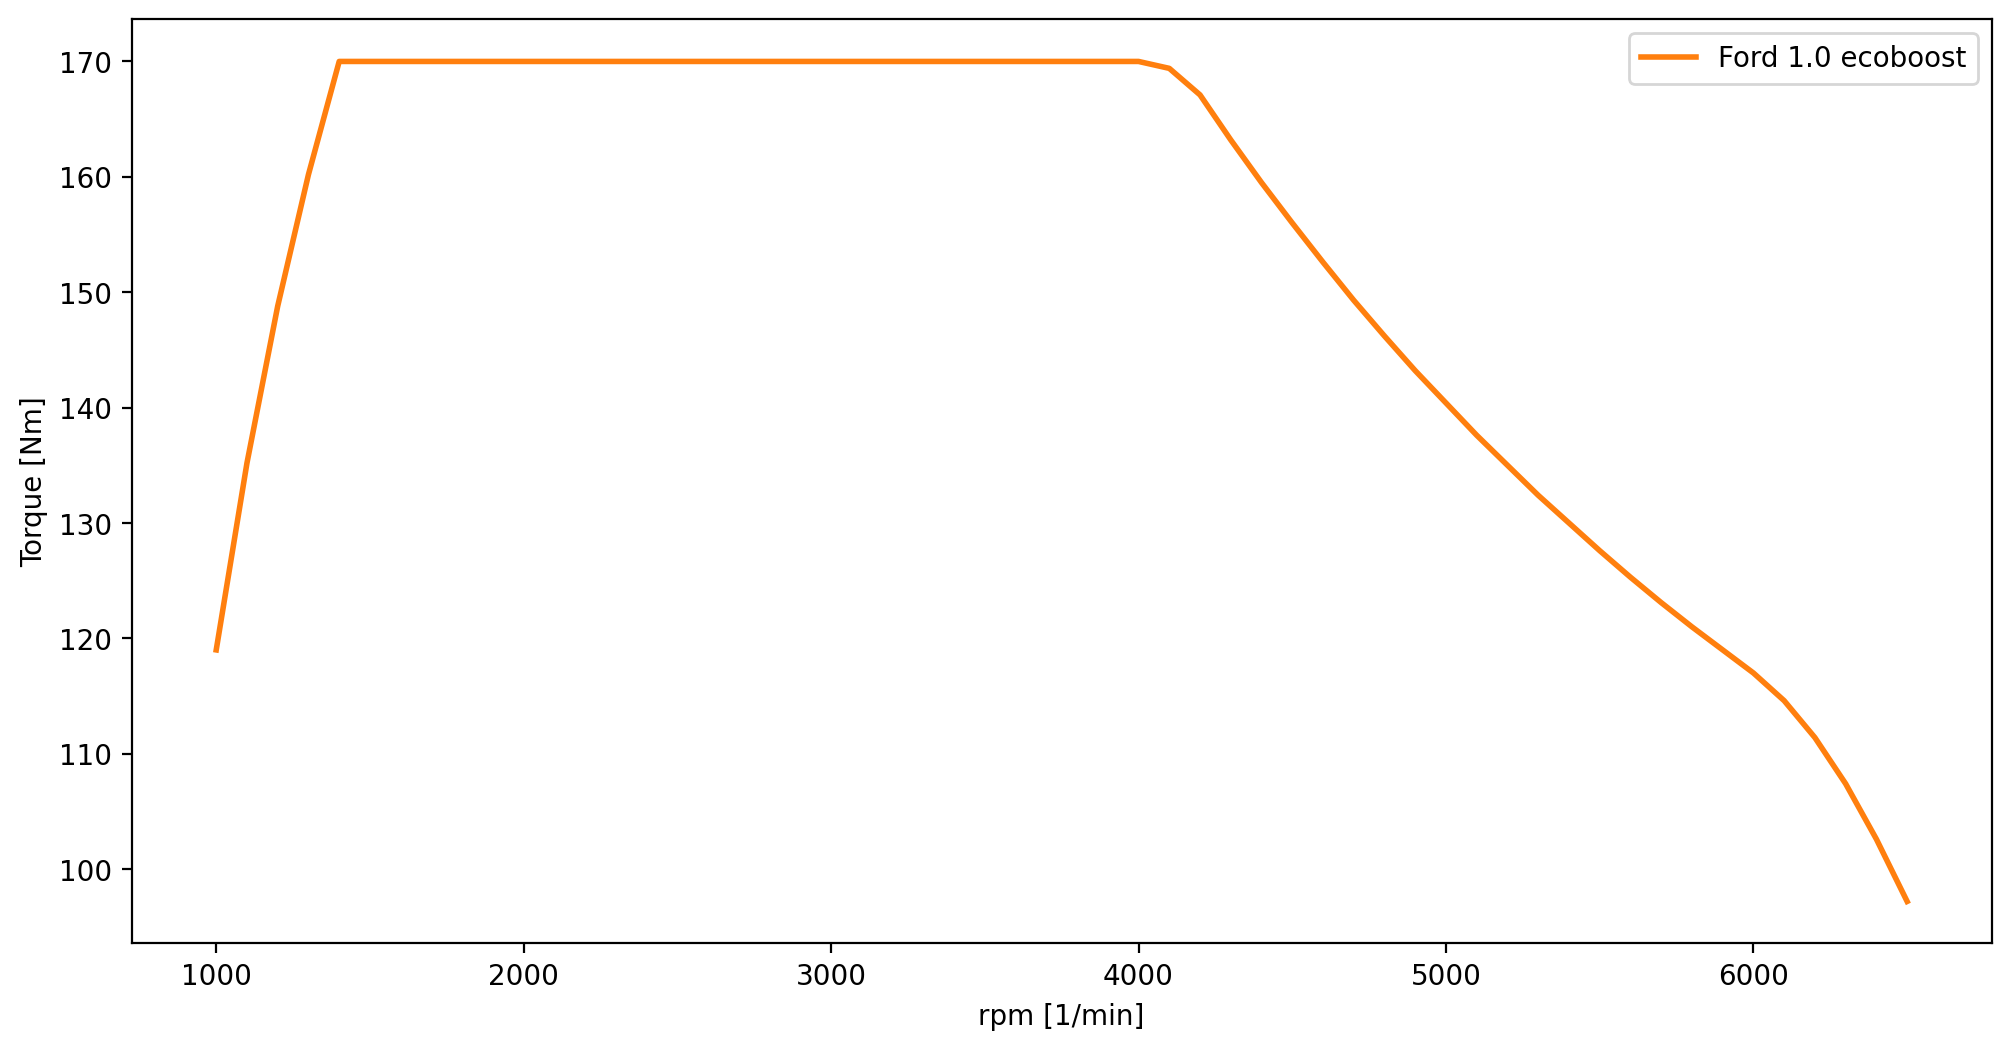

In [9]:
#other torque data slide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def savetheplot(name, fig):
    dpi = 600
    fig.savefig(f'images/png/{name}.png', dpi=dpi)
    fig.savefig(f'images/svg/{name}.svg')

#modify standard plot definitions
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 200
mpl.rcParams['lines.linewidth'] = 2.0

ford1l = pd.read_csv('csv/Ford1Lecoboost.csv', skipinitialspace=True)

plt.plot(ford1l['rpm'],ford1l['torque[Nm]'], label='Ford 1.0 ecoboost', c='C1')
plt.xlabel('rpm [1/min]')
plt.ylabel('Torque [Nm]')
plt.legend(loc='best')


fig = plt.gcf()
savetheplot('ford_tq_spd', fig)

plt.show()

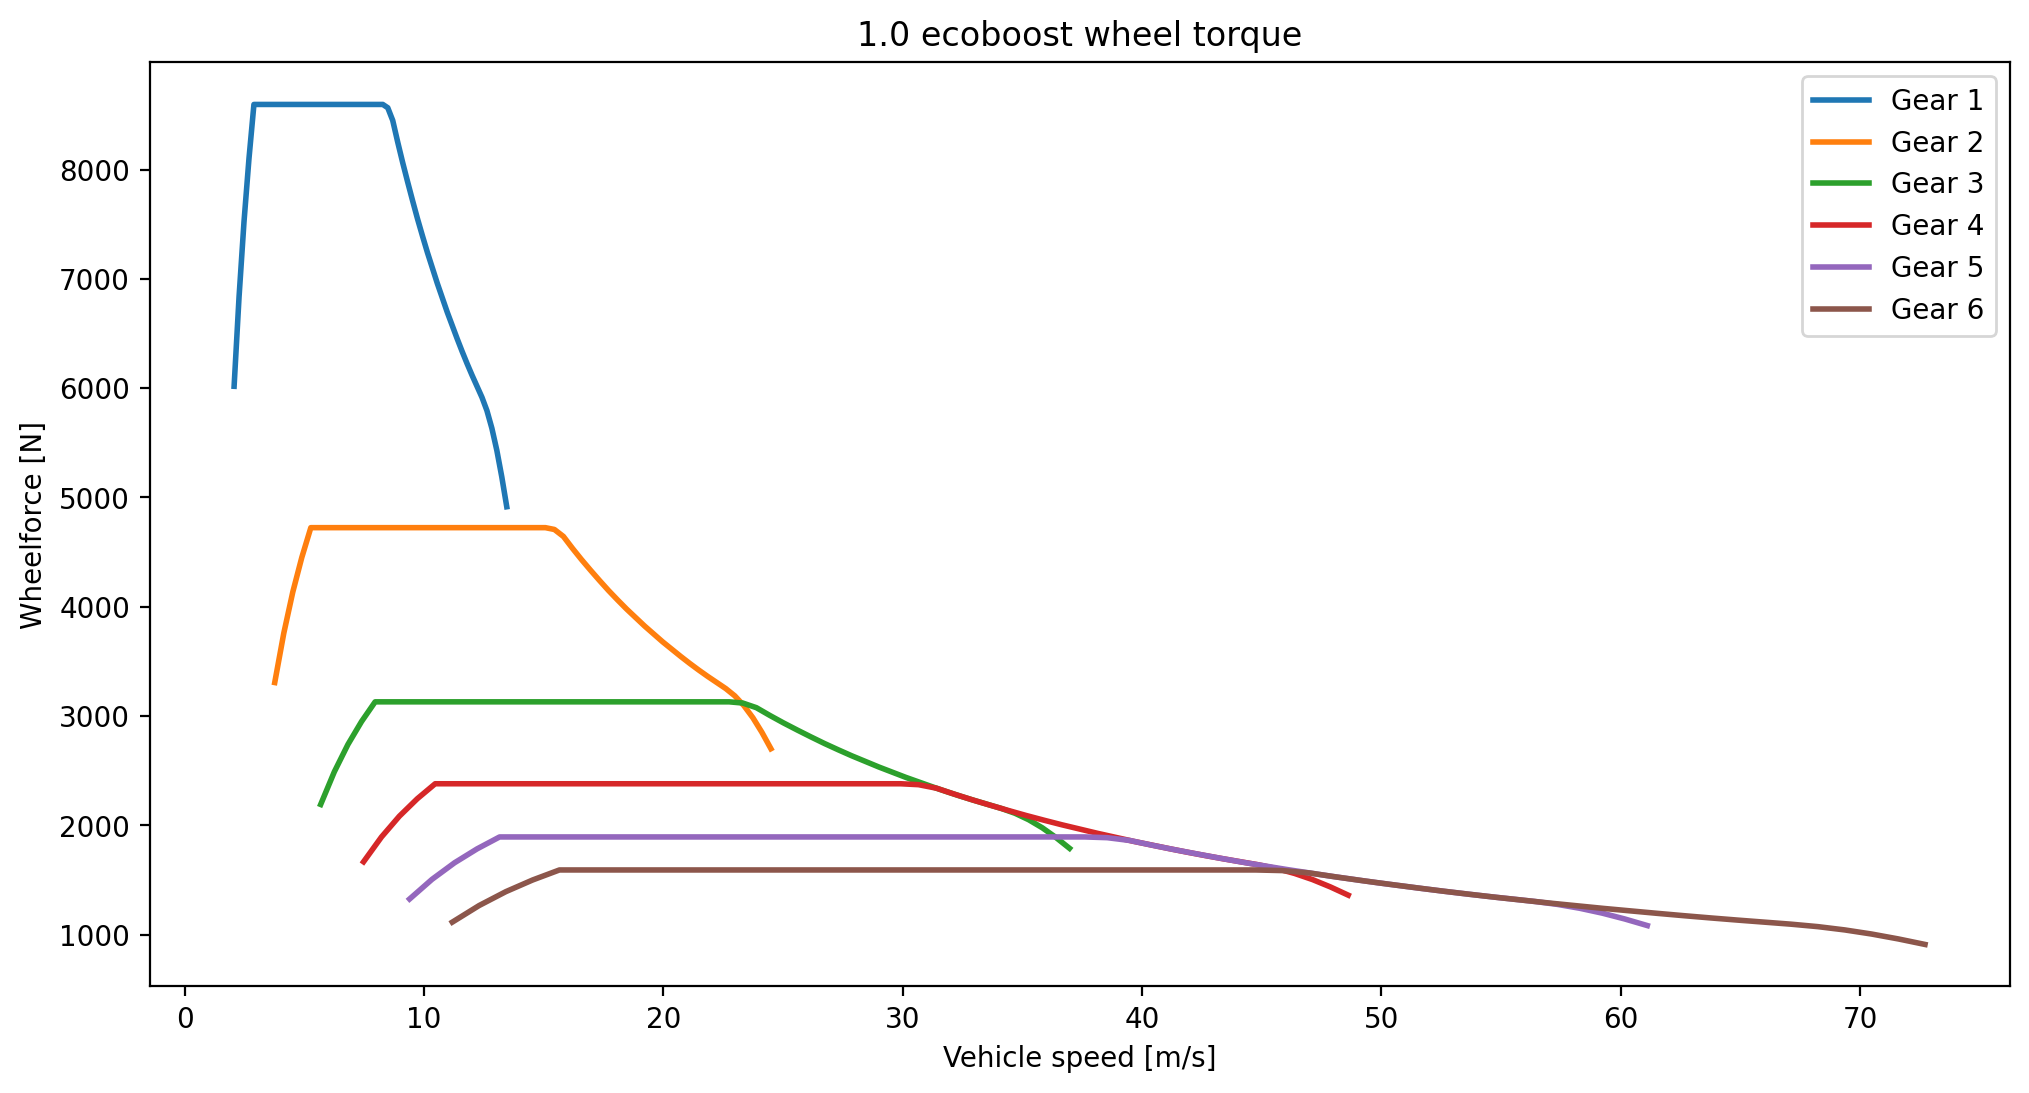

In [8]:
GRs = np.array([3.727, 2.048, 1.357, 1.032, 0.821, 0.690])
Reverse = 3.82 
FD = 4.07
Gtot = GRs*FD
wheelR = 0.3
for g, value in enumerate(Gtot):
    ford1l[f'wheeltorque{g+1}']=Gtot[g]*ford1l['torque[Nm]']
    ford1l[f'wheelrpm{g+1}']=ford1l['rpm']/Gtot[g]
    ford1l[f'wheelforce{g+1}']=ford1l[f'wheeltorque{g+1}']/wheelR
    ford1l[f'wheelrads{g+1}']=ford1l[f'wheelrpm{g+1}']*(2*np.pi)/60
    ford1l[f'wheelms{g+1}']=ford1l[f'wheelrads{g+1}']*wheelR
    plt.plot(ford1l[f'wheelms{g+1}'],ford1l[f'wheelforce{g+1}'], label=f'Gear {g+1}')
#insert the reverse gear
ford1l['wheeltorque_r']=Reverse*FD*-ford1l['torque[Nm]']
ford1l['wheelrpm_r']=-ford1l['rpm']/(Reverse*FD)
ford1l['wheelforce_r']=ford1l['wheeltorque_r']/wheelR
ford1l['wheelrads_r']=ford1l[f'wheelrpm_r']*(2*np.pi)/60
ford1l[f'wheelms_r']=ford1l[f'wheelrads_r']*wheelR
plt.title('1.0 ecoboost wheel torque')
plt.xlabel('Vehicle speed [m/s]')
plt.ylabel('Wheelforce [N]')
plt.legend(loc='best')


fig = plt.gcf()
savetheplot('ford_gears', fig)

plt.show()
